In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# use amazon data
# uncomment the other pd.read_csv line to change data source
# note:  the varible name "amazon_df" was already used too many times for me to want and change to a more robust name, such as "reviews_df"

amazon_df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', lineterminator='\n', header=None)
# amazon_df = pd.read_csv('imdb_labelled.txt', sep='\t', lineterminator='\n', header=None)
amazon_df.columns = ["review", "sentiment"]
amazon_df.head(5)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
pd.set_option('display.max_colwidth', 500)
# look for positive keywords
amazon_df.loc[amazon_df['sentiment'] == 1]

,review,sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the original battery to the extended battery.,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue tooth phone.,1
17,So Far So Good!.,1
18,Works great!.,1


In [4]:
# look for negative keywords
amazon_df.loc[amazon_df['sentiment'] == 0]

,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
14,"The design is very odd, as the ear ""clip"" is not very comfortable at all.",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you wonder how long that mechanism would last.,0


In [5]:
# simple keywords to look for 
keywords = ['good', 'great', 'impressed', 'impressive', 'love', 'best', 'recommend', 'nice', 'easy', 'excellent', 'happy', 'like', 'satisifed', 'wow', 'unacceptible', 'hate', 'poor', 'worthless', 'junk', 'garbage', 'bad', 'wrong', 'complain', 'refund', 'breaks', 'hard', 'negative', 'mistake', 'misleading']

In [6]:
for key in keywords:
    truth = (amazon_df.review.str.contains(str(key) + ' ', case=False )) | (amazon_df.review.str.contains(' ' + str(key) + ' ', case=False )) | (amazon_df.review.str.contains(' ' + str(key), case=False ))
    amazon_df[str(key)] = truth

In [7]:
pd.set_option('display.max_columns', 500)
amazon_df

,review,sentiment,good,great,impressed,impressive,love,best,recommend,nice,easy,excellent,happy,like,satisifed,wow,unacceptible,hate,poor,worthless,junk,garbage,bad,wrong,complain,refund,breaks,hard,negative,mistake,misleading
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# keywords with multiple variations
problem = (amazon_df.review.str.contains('problem ', case=False )) | (amazon_df.review.str.contains(' problem ', case=False )) | (amazon_df.review.str.contains('problem ', case=False )) | (amazon_df.review.str.contains('problem ', case=False )) | (amazon_df.review.str.contains(' problem ', case=False )) | (amazon_df.review.str.contains(' ccc', case=False ))

amazon_df['problem'] = problem

In [9]:
waste = (amazon_df.review.str.contains('waste ', case=False )) | (amazon_df.review.str.contains(' waste ', case=False )) | (amazon_df.review.str.contains('waste ', case=False )) | (amazon_df.review.str.contains('wasted ', case=False )) | (amazon_df.review.str.contains(' wasted ', case=False )) | (amazon_df.review.str.contains(' wasted', case=False ))

amazon_df['waste'] = waste

In [10]:
returned = (amazon_df.review.str.contains('return ', case=False )) | (amazon_df.review.str.contains(' return ', case=False )) | (amazon_df.review.str.contains('return ', case=False )) | (amazon_df.review.str.contains('returned ', case=False )) | (amazon_df.review.str.contains(' returned ', case=False )) | (amazon_df.review.str.contains(' returned', case=False ))

amazon_df['returned'] = returned

In [11]:
disappointed = (amazon_df.review.str.contains('disappointed ', case=False )) | (amazon_df.review.str.contains(' disappointed ', case=False )) | (amazon_df.review.str.contains('disappointed ', case=False )) | (amazon_df.review.str.contains('disappointment ', case=False )) | (amazon_df.review.str.contains(' disappointment ', case=False )) | (amazon_df.review.str.contains(' disappointment', case=False ))

amazon_df['disappointed'] = disappointed

In [12]:
fails = (amazon_df.review.str.contains('fails ', case=False )) | (amazon_df.review.str.contains(' fails ', case=False )) | (amazon_df.review.str.contains('fails ', case=False )) | (amazon_df.review.str.contains('failed ', case=False )) | (amazon_df.review.str.contains(' failed ', case=False )) | (amazon_df.review.str.contains(' failed', case=False ))

amazon_df['fails'] = fails

In [13]:
couldnt = (amazon_df.review.str.contains("couldnt ", case=False )) | (amazon_df.review.str.contains(" couldnt ", case=False )) | (amazon_df.review.str.contains("couldnt ", case=False )) | (amazon_df.review.str.contains("couldn't ", case=False )) | (amazon_df.review.str.contains(" couldn't ", case=False )) | (amazon_df.review.str.contains(" couldn't", case=False )) | (amazon_df.review.str.contains("cannot ", case=False )) | (amazon_df.review.str.contains(" cannot ", case=False )) | (amazon_df.review.str.contains("cannot ", case=False )) | (amazon_df.review.str.contains("can not ", case=False )) | (amazon_df.review.str.contains(" can not ", case=False )) | (amazon_df.review.str.contains(" can not", case=False )) | (amazon_df.review.str.contains("can't ", case=False )) | (amazon_df.review.str.contains(" can't ", case=False )) | (amazon_df.review.str.contains("can't ", case=False )) | (amazon_df.review.str.contains("cant ", case=False )) | (amazon_df.review.str.contains(" cant ", case=False )) | (amazon_df.review.str.contains(" cant", case=False ))

amazon_df['couldnt'] = couldnt

In [14]:
Doesnt = (amazon_df.review.str.contains("Doesn't ", case=False )) | (amazon_df.review.str.contains(" Doesn't ", case=False )) | (amazon_df.review.str.contains("Doesn't ", case=False )) | (amazon_df.review.str.contains("Doesnt ", case=False )) | (amazon_df.review.str.contains(" Doesnt ", case=False )) | (amazon_df.review.str.contains(" Doesnt", case=False )) | (amazon_df.review.str.contains("does not ", case=False )) | (amazon_df.review.str.contains(" does not ", case=False )) | (amazon_df.review.str.contains("does not ", case=False )) | (amazon_df.review.str.contains("didn't ", case=False )) | (amazon_df.review.str.contains(" didn't ", case=False )) | (amazon_df.review.str.contains(" didn't", case=False )) | (amazon_df.review.str.contains("didnt ", case=False )) | (amazon_df.review.str.contains(" didnt ", case=False )) | (amazon_df.review.str.contains("didnt ", case=False )) | (amazon_df.review.str.contains("did not ", case=False )) | (amazon_df.review.str.contains(" did not ", case=False )) | (amazon_df.review.str.contains(" did not", case=False ))

amazon_df['Doesnt'] = Doesnt

In [15]:
amazon_df

,review,sentiment,good,great,impressed,impressive,love,best,recommend,nice,easy,excellent,happy,like,satisifed,wow,unacceptible,hate,poor,worthless,junk,garbage,bad,wrong,complain,refund,breaks,hard,negative,mistake,misleading,problem,waste,returned,disappointed,fails,couldnt,Doesnt
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [16]:
amazon_df['sentiment'] = (amazon_df['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

amazon_df.head()

,review,sentiment,good,great,impressed,impressive,love,best,recommend,nice,easy,excellent,happy,like,satisifed,wow,unacceptible,hate,poor,worthless,junk,garbage,bad,wrong,complain,refund,breaks,hard,negative,mistake,misleading,problem,waste,returned,disappointed,fails,couldnt,Doesnt
0,So there is no way for me to plug it in here in the US unless I go by a converter.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


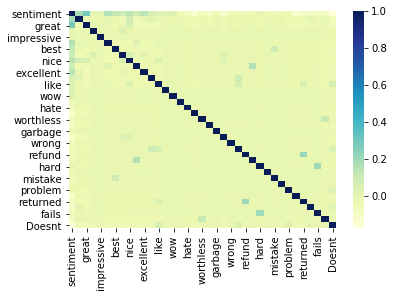

In [17]:
# make sure keywords are not highly correlated with eachother
sns.heatmap(amazon_df.corr(),cmap="YlGnBu")

In [18]:
data = amazon_df.drop(['review', 'sentiment'], axis=1)
target = amazon_df['sentiment']

In [19]:
# training input
data.head()

,good,great,impressed,impressive,love,best,recommend,nice,easy,excellent,happy,like,satisifed,wow,unacceptible,hate,poor,worthless,junk,garbage,bad,wrong,complain,refund,breaks,hard,negative,mistake,misleading,problem,waste,returned,disappointed,fails,couldnt,Doesnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# training output
target.head()

0    False
1     True
2     True
3    False
4     True
Name: sentiment, dtype: bool

In [21]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

In [22]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

In [23]:
# Fit our model to the data.
# Train the model to recognize correlations between the input
# and output
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [25]:
y_pred

array([False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [26]:
# percent accuracy
(1 - ((target != y_pred).sum() / data.shape[0])) 

0.741

0.5


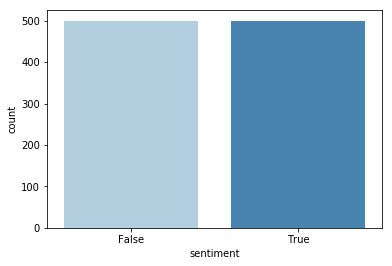

In [27]:
# null hypothesis
print(amazon_df[amazon_df.sentiment == True].shape[0] / data.shape[0])
sns.countplot(x = "sentiment", data = amazon_df, palette = "Blues");
plt.show()

The amazon data is actully 50% positive, my model is  74% accurate on the Amazon data.

I could probably increse the accuracy if I:
* included more keywordd
* included punctuation, such as, "great!" or "terrible!!!"
* considered when keywords were used in conjunction with negators.  e.g. "great" is a positive sentiment while "not great" is a negative sentiment

If I swap the Amazon data with IMDB data, the actual sentiment is 52% positive, my model provides 64% accuracy.  64% is not good considering 52% accuracy simply guessing positive for all reviews.

It is not suprising that the model created for amazon does not translate well for IMDB.  While there a lot of overlap in the keywords, there are a lot of keywords specificlly for products and specifically for movies.  e.g. people might describe products as being "broken" but would not describe movies as being "broken." Likewise, movies might be "boring" but products are less likely to be described as "boring."  